In [1]:
import tweepy
from textblob import TextBlob
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [2]:
api_key = '9engYOyGjKdMVtgVfe0gMjX7e'
api_secret_key = 'mWt9ezxyPPwxbfEsdUUyqL3HCKiEW3NTdJ4bYc9cGzMcuj1BS7'
access_token = '396483432-L4Dfs1HCF8WHS7r2Cj6EWkQvFldd9HIApuJ9dWPa'
access_toket_secret = '5NhiysOkDkGPglmOmhtjrzP2XPULp6hlK9JzOKd0QBvKr'

In [3]:
auth = tweepy.OAuthHandler(api_key,api_secret_key)
auth.set_access_token(access_token,access_toket_secret)
api = tweepy.API(auth, wait_on_rate_limit=True)

In [5]:
#Gather the 2000 tweets about bitcoin
search_term = 'bitcoin -filter:retweets'
#Create a cursor object
tweets = tweepy.Cursor(api.search, q=search_term, lang='en', since = '2021-05-11', tweet_mode = 'extended').items(2000)
#Store the tweets in a variable and get the full text
all_tweets = [tweet.full_text for tweet in tweets]

In [9]:
#Create a dataFrame to store 
df = pd.DataFrame(all_tweets, columns=['Tweets'])

df.head(5)

,Tweets
0,Dark Web Drug Dealer Laundered $137 Million Wo...
1,@hmalviya9 We are really interested to find ou...
2,Our inspiring Peers from Nigeria proved that #...
3,Small bitcoin weights can have a positive impa...
4,Small bitcoin weights can have a positive impa...


In [10]:
#Create a function to cclean the tweets
def cleanTwt(twt):
  twt = re.sub('#Bitcoin', 'bitcoin', twt) #remove the hastag '#' from bitcoin
  twt = re.sub('#bitcoin', 'bitcoin', twt) #remove the hastag '#' from Bitcoin
  twt = re.sub('#[A-Za-z0-9]+', '', twt) #removes any strings with a '#' 
  twt = re.sub('\\n','', twt) #removes the '\n' string 
  twt = re.sub('https?:\/\/S+','',twt ) #removes any hyperlinks
  return twt

In [11]:
df['Cleaned_Tweets'] = df['Tweets'].apply(cleanTwt)

In [12]:
df.head()

,Tweets,Cleaned_Tweets
0,Dark Web Drug Dealer Laundered $137 Million Wo...,Dark Web Drug Dealer Laundered $137 Million Wo...
1,@hmalviya9 We are really interested to find ou...,@hmalviya9 We are really interested to find ou...
2,Our inspiring Peers from Nigeria proved that #...,Our inspiring Peers from Nigeria proved that b...
3,Small bitcoin weights can have a positive impa...,Small bitcoin weights can have a positive impa...
4,Small bitcoin weights can have a positive impa...,Small bitcoin weights can have a positive impa...


In [13]:
#Create a function to get the subjectivity 
def getSubjectivity(twt):
  return TextBlob(twt).sentiment.subjectivity

#Create a function to get the polarity
def getPolarity(twt):
  return TextBlob(twt).sentiment.polarity

#Create two ne columns called 'Subjectivity' & Polarity
df['Subjectivity'] = df['Cleaned_Tweets'].apply(getSubjectivity)
df['Polarity'] = df['Cleaned_Tweets'].apply(getPolarity)

df.head()

,Tweets,Cleaned_Tweets,Subjectivity,Polarity
0,Dark Web Drug Dealer Laundered $137 Million Wo...,Dark Web Drug Dealer Laundered $137 Million Wo...,0.250000,0.075000
1,@hmalviya9 We are really interested to find ou...,@hmalviya9 We are really interested to find ou...,0.288636,0.080114
2,Our inspiring Peers from Nigeria proved that #...,Our inspiring Peers from Nigeria proved that b...,1.000000,0.500000
3,Small bitcoin weights can have a positive impa...,Small bitcoin weights can have a positive impa...,0.472727,-0.011364
4,Small bitcoin weights can have a positive impa...,Small bitcoin weights can have a positive impa...,0.472727,-0.011364


In [14]:
#Create a Function to get the sentiment text 
def getSentiment(score):
  if score < 0:
    return 'Negative'
  elif score == 0:
    return 'Neutral'
  else:
    return 'Positive'

In [15]:
#Create a column to store the text sentiment 
df['Sentiment'] = df['Polarity'].apply(getSentiment)
#Show the data
df.head()

,Tweets,Cleaned_Tweets,Subjectivity,Polarity,Sentiment
0,Dark Web Drug Dealer Laundered $137 Million Wo...,Dark Web Drug Dealer Laundered $137 Million Wo...,0.250000,0.075000,Positive
1,@hmalviya9 We are really interested to find ou...,@hmalviya9 We are really interested to find ou...,0.288636,0.080114,Positive
2,Our inspiring Peers from Nigeria proved that #...,Our inspiring Peers from Nigeria proved that b...,1.000000,0.500000,Positive
3,Small bitcoin weights can have a positive impa...,Small bitcoin weights can have a positive impa...,0.472727,-0.011364,Negative
4,Small bitcoin weights can have a positive impa...,Small bitcoin weights can have a positive impa...,0.472727,-0.011364,Negative


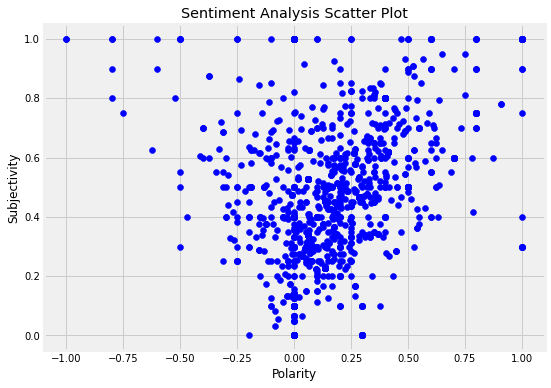

In [16]:
#Create a scatter plot to show the subjectivity and polarity
plt.figure(figsize=(8,6))
for i in range(0, df.shape[0]):
  plt.scatter(df['Polarity'][i], df['Subjectivity'][i], color ='blue')
plt.title('Sentiment Analysis Scatter Plot')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()


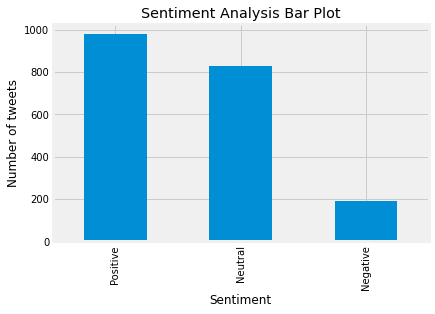

In [17]:
#Create a bar chart to show the count of Possitive, Neutral, and Negative Sentiments
df['Sentiment'].value_counts().plot(kind='bar')
plt.title('Sentiment Analysis Bar Plot')
plt.xlabel('Sentiment')
plt.ylabel('Number of tweets')
plt.show()

In [18]:
df['Sentiment'].value_counts()

Positive    978
Neutral     829
Negative    193
Name: Sentiment, dtype: int64

In [19]:
pd.set_option("display.max_rows", None, "display.max_columns", None)

In [20]:
df_2=df[df['Sentiment']=='Positive']

In [21]:
df_2

,Tweets,Cleaned_Tweets,Subjectivity,Polarity,Sentiment
0,Dark Web Drug Dealer Laundered $137 Million Wo...,Dark Web Drug Dealer Laundered $137 Million Wo...,0.250000,7.500000e-02,Positive
1,@hmalviya9 We are really interested to find ou...,@hmalviya9 We are really interested to find ou...,0.288636,8.011364e-02,Positive
2,Our inspiring Peers from Nigeria proved that #...,Our inspiring Peers from Nigeria proved that b...,1.000000,5.000000e-01,Positive
5,@Swopfi Buying #Bitcoin is the best way to le...,@Swopfi Buying bitcoin is the best way to lea...,0.166667,2.666667e-01,Positive
6,Don't be a victim of crypto phishing. Keep you...,Don't be a victim of crypto phishing. Keep you...,0.275000,2.125000e-01,Positive
7,"@Kurnik777 @coinbureau #bnb is like Bitcoin, f...","@Kurnik777 @coinbureau is like Bitcoin, far m...",0.625000,4.000000e-01,Positive
8,@samsungID Do you know that you can make up to...,@samsungID Do you know that you can make up to...,0.466667,2.833333e-01,Positive
10,@TheEconomist For all those who are new to thi...,@TheEconomist For all those who are new to thi...,0.338636,6.221591e-02,Positive
11,There is no doubt in my mind that with a very ...,There is no doubt in my mind that with a very ...,0.526667,2.816667e-01,Positive
12,@IIKHUNE_32_16 I wish I contacted earlier @Lin...,@IIKHUNE_32_16 I wish I contacted earlier @Lin...,0.400000,1.000000e-01,Positive


In [22]:
df_2.to_csv('sentiment_positive.csv')